In [1]:
print('lolkek')
%pip install matplotlib scikit-learn

lolkek

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Часть 1
## Сохранить на диск:
- словарь токенов (токен:количество)
- матрица термин-документ (токен:документ)

In [ ]:
from pathlib import Path
basePath = Path('..') / '..' / 'lab1' / 'assets' / 'annotated-corpus' / 'train'

classes = ['1', '2', '3', '4']
filenames = basePath.glob('*.tsv')

tokenCount = {}
tokenFilenames = {}
for i, cls in enumerate(classes):
    for filename in (basePath / cls).glob('*.tsv'):
        with open(filename) as f:
            for line in f:
                token = line.split('\t')[1]

                if (token in tokenCount):
                    tokenCount[token] += 1
                else:
                    tokenCount[token] = 1

                if (token in tokenFilenames):
                    tokenFilenames[token].add(filename.stem)
                else:
                    tokenFilenames[token] = {filename.stem}
import json
with open("tokenCount.json", "w") as tokenCountFile: 
    json.dump(tokenCount, tokenCountFile)

with open("tokenFilenames.json", "w") as tokenFilenamesFile: 
    json.dump(dict([(t, list(s)) for (t, s) in tokenFilenames.items()]), tokenFilenamesFile)


basePath = Path('..') / 'assets' / 'annotated-corpus' / dataset_name / str(class_id)

In [11]:
from pathlib import Path
basePath = Path('..') / '..' / 'lab1' / 'assets' / 'annotated-corpus' / 'train'

classes = ['1', '2', '3', '4']
filenames = basePath.glob('*.tsv')

res = {}
filesDict = {}
classDicts = [{} for cls in classes]
for i, cls in enumerate(classes):
    for filename in (basePath / cls).glob('*.tsv'):
        with open(filename) as f:
            for line in f:
                token = line.split('\t')[1]
                if (token in classDicts[i]):
                    classDicts[i][token] += 1
                else:
                    classDicts[i][token] = 1

                if (token in res):
                    res[token] += 1
                else:
                    res[token] = 1

                if (token in filesDict):
                    filesDict[token].add(filename.stem)
                else:
                    filesDict[token] = {filename.stem}

                    
filesDictCount = dict([(t, len(s)) for (t, s) in filesDict.items()])
# print(d)
print(dict(sorted(res.items(), key=lambda t: t[1], reverse=True)))
for classDict in classDicts:
    print(dict(sorted(classDict.items(), key=lambda t: t[1], reverse=True)))

In [3]:
filesDictCount

{'washington': 288,
 'in': 5082,
 'blast': 33,
 'new': 1327,
 'overtim': 39,
 'rule': 188,
 'that': 2003,
 'take': 258,
 'effect': 91,
 'monday': 767,
 'democrat': 88,
 'vice': 23,
 'presidenti': 72,
 'nomine': 9,
 'john': 160,
 'edward': 30,
 'say': 468,
 'he': 550,
 "can't": 10,
 'understand': 22,
 'whi': 37,
 'the': 8095,
 'bush': 151,
 'administr': 83,
 'want': 108,
 'to': 5535,
 'undermin': 9,
 'a': 5958,
 'system': 249,
 'reward': 12,
 'worker': 70,
 'who': 459,
 'toil': 2,
 'long': 88,
 'hour': 116,
 'if': 246,
 'you': 160,
 'work': 199,
 'hard': 45,
 'then': 78,
 'should': 111,
 'be': 895,
 'for': 2744,
 'effort': 120,
 'said': 1617,
 'saturday': 283,
 'week': 516,
 'radio': 33,
 'address': 22,
 'dhaka': 26,
 'bangladesh': 38,
 'an': 1328,
 'angri': 14,
 'mob': 7,
 'set': 224,
 'fire': 91,
 'passeng': 35,
 'train': 61,
 'and': 4322,
 'protest': 77,
 'clash': 50,
 'with': 1794,
 'polic': 167,
 'across': 108,
 'yesterday': 422,
 'leav': 99,
 'dozen': 59,
 'of': 5397,
 'peopl': 34

In [4]:

filtered = [(t, c) for (t, c) in list(tokenCount.items()) if c >= 10]

def filterDictByCount(d, n):
    return dict([(t, c) for (t, c) in list(tokenCount.items()) if c >= n])

def filterDictByTokenList(d, token_list):
    return dict([(t, c) for (t, c) in list(tokenCount.items()) if t in token_list])

def filterDictByTokensInOtherDict(d, dtokens):
    token_list = [t for (t, c) in dtokens.items()]
    return filterDictByTokenList(d, token_list)

def barPrintDict(d):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    sortedDict = sorted(d.items(), key=lambda t: t[1], reverse=True)
    token, counts = zip(*sortedDict)
    ax.bar(token, counts)
    plt.show()

def freqCount(d):
    dictAsList = d.items()
    N = 0
    for (_, count) in dictAsList:
        N += count
    return dict([(token, count/N) for (token, count) in dictAsList])


In [5]:
print(len(filesDictCount))
filesDictCountFreq = freqCount(filterDictByCount(filesDictCount, 2))
filesDictCountFreq

15360


{'washington': 0.0009532490708228754,
 'in': 0.02217186727691725,
 'blast': 0.00010591656342476394,
 'new': 0.004721311054479629,
 'overtim': 0.00014443167739740535,
 'rule': 0.0006483377518727974,
 'that': 0.0073210812476329256,
 'take': 0.0008312845432428442,
 'effect': 0.0002984921332879711,
 'monday': 0.0024713864799111585,
 'democrat': 0.00028565376196375725,
 'vice': 7.38206351142294e-05,
 'presidenti': 0.00023109068383584858,
 'nomine': 2.8886335479481073e-05,
 'john': 0.0005263732242927662,
 'edward': 9.949737776265702e-05,
 'say': 0.0015277661875814435,
 'he': 0.002105492897171065,
 "can't": 3.530552114158798e-05,
 'understand': 7.38206351142294e-05,
 'whi': 0.0001219645275800312,
 'the': 0.05455986853507764,
 'bush': 0.000510325260137499,
 'administr': 0.00026639620497743657,
 'want': 0.00036910317557114705,
 'to': 0.02588215658961504,
 'undermin': 2.8886335479481073e-05,
 'a': 0.029842794143135003,
 'system': 0.0008922668070328598,
 'reward': 4.1724706803694886e-05,
 'worker

In [6]:
from math import log


def wordsToDict(words):
    res = {}
    for word in words:
        if (word in res):
            res[word] += 1
        else:
            res[word] = 1
    return res
    

def textToVec(str, d):
    words = str.split(' ');
    header = sorted(d.keys())
    inputD = freqCount(wordsToDict(words))
    result = []
    for h in header:
        if h in inputD:
            result.append(inputD[h]*log(pow(d[h], -1)))
        else:
            result.append(0)
    return result

    
    
    # text => dict
    # 


In [18]:
import sys
sys.path.append('../../lab1/src')

import lab1
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def textToLemms(str):
    lemmer = WordNetLemmatizer()
    return [lemmer.lemmatize(token.value) for token in lab1.tokenize(str)]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/daniilprohorov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
textToLemms('one two three four five')

['one', 'two', 'three', 'four', 'five']

In [7]:
freqCount(wordsToDict('one two one three'.split(' ')))

{'one': 0.5, 'two': 0.25, 'three': 0.25}

In [8]:
vec = textToVec('one two one three', filesDictCountFreq)
[v for v in vec if v != 0]

[3.1492403780307803, 1.7363959995300249, 1.5481492043010343]

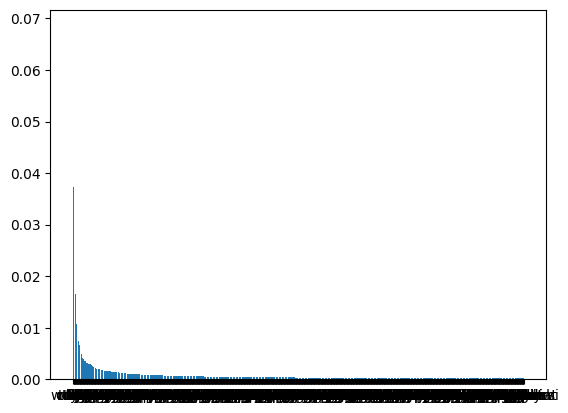

1196
{'the': 0.06828909680348054, 'a': 0.03735231614087664, 'to': 0.0323950395095751, 'of': 0.031193884150775127, 'in': 0.027751107754482238, 'and': 0.022408175890923844, 'on': 0.016611295681063124, 'it': 0.01350998485499765, 'for': 0.01263824334041707, 's': 0.010645691307090031, 'that': 0.009163329008102777, 'with': 0.007741225339155656, 'as': 0.007684983951118199, 'at': 0.007415828736938942, 'reuter': 0.007359587348901485, 'by': 0.0068493976145616985, 'said': 0.0066525527564306, 'is': 0.0065641734323717395, 'new': 0.005909362985935636, 'has': 0.005776793999847345, 'an': 0.005772776757844669, 'from': 0.00556789741570822, 'his': 0.004985397325320275, 'was': 0.004511362769004568, 'after': 0.00419801789279588, 'will': 0.004109638568737019, 'have': 0.0038967247425952187, 'be': 0.0038886902585898676, 'olymp': 0.003832448870552411, 'ap': 0.0036034660763999086, 'are': 0.003551241930365127, 'their': 0.0035231212363463988, 'tuesday': 0.0035191039943437232, 'compani': 0.0034950005423276705, 'at

In [38]:


freqCalculated = freqCount(filterDictByCount(tokenCount, 40))
barPrintDict(freqCalculated)
print(len(freqCalculated))
print(dict(sorted(freqCalculated.items(), key=lambda t: t[1], reverse=True)))

In [10]:
def toVec(d, sent):
    words = sent.split(' ');
    result = [] 
    for word in words:
        if word in d:
            result.append(d[word])
    return result

commonWord2FreqDict = freqCount(tokenCount)
print(toVec(commonWord2FreqDict, 'what can we do today'))

[0.0007429584226614911, 0.0008279579032202211, 0.00025499844167618975, 0.0005162931411715446, 0.001019993766704759]


In [7]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 11.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.8 MB/s eta 0:00:00


In [63]:
import gensim

model= gensim.models.Word2Vec([ s.split(' ') for s in ["today im going fast", "cat is not dog", "my name is Danii", "hello im programmer"]], min_count=1)
model.train([['today', 'what']], total_examples=1, epochs=1)
print(model.wv.key_to_index.keys())
data=model.wv.most_similar('cat', topn=1)
print(data)

dict_keys(['is', 'im', 'programmer', 'hello', 'Danii', 'name', 'my', 'dog', 'not', 'cat', 'fast', 'going', 'today'])
[('is', 0.21617141366004944)]
